In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data**

In [7]:
# Load data
df = pd.read_csv('../data/HR_data.csv')

In [8]:
# Inspect data
# How many participants do we have
print(f'There are {np.max(df['Individual'].unique())} different participants.')

# How many observations in total
# There will be 4 rounds x 3 phases recordings per participant 
print(f'\nThere are {len(df)} observations in total.\n')

# Participants only play once (in one cohort)
cohorts = df['Cohort'].unique()
cohorts.sort()

for cohort in cohorts:
    df_cohort = df.copy()
    df_cohort = df[df['Cohort'] == cohort]
    print(f"Participants in cohort {cohort}: {df_cohort['Individual'].unique().tolist()}")

There are 26 different participants.

There are 312 observations in total.

Participants in cohort D1_1: [7, 8, 9, 10, 11, 12, 13, 14]
Participants in cohort D1_2: [15, 16, 17, 18, 19, 20]
Participants in cohort D1_3: [21, 22, 23, 24]
Participants in cohort D1_4: [1, 2, 3, 4]
Participants in cohort D1_5: [25, 26]
Participants in cohort D1_6: [5, 6]


In [9]:
# Order the data frame so it is more clear to read
df_new = df.copy()
df_new = df_new.sort_values(by=['Cohort', 'Round', 'Phase'])
df_new.reset_index(drop=True, inplace=True)

# Define the columns to move to the front
cols_to_front = ['Unnamed: 0','Cohort', 'Round', 'Phase','Individual','Puzzler']

# Get all other columns, excluding the ones moved to the front
other_cols = [col for col in df_new.columns if col not in cols_to_front]

# Create the new column order
new_column_order = cols_to_front + other_cols

# Reindex the DataFrame with the new column order
df_new = df_new[new_column_order]

In [10]:
df_new.columns

Index(['Unnamed: 0', 'Cohort', 'Round', 'Phase', 'Individual', 'Puzzler',
       'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max',
       'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min',
       'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope', 'TEMP_TD_Mean',
       'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max',
       'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min',
       'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope',
       'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min',
       'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew',
       'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean',
       'EDA_TD_P_Slope', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std',
       'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis',
       'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max',
       'EDA_TD_T_Slope_mean', 'EDA_TD_T

In [11]:
nan_counts = df_new.isnull().sum()

# Display columns with NaN values and their counts
print("NaN values in each column:")
print(nan_counts[nan_counts > 0])


rows_with_nan = df_new[df_new.isnull().any(axis=1)]

# Display the rows with NaN values
print("Rows with NaN values:")
print(rows_with_nan.index)

NaN values in each column:
EDA_TD_P_RT     1
EDA_TD_P_ReT    1
inspired        2
attentive       1
afraid          1
active          1
determined      2
dtype: int64
Rows with NaN values:
Index([28, 52, 68, 74, 206], dtype='int64')


In [12]:
# Identify columns with nan values
nan_counts = df_new.isnull().sum()
cols_with_nan = nan_counts[nan_counts > 0].index

# Identify rows with nan values
rows_with_nan_index = df_new[df_new.isnull().any(axis=1)].index

# See the specific rows and columns with nan values
print("Subset of DataFrame showing only rows and columns with missing values:")
df_new.loc[rows_with_nan_index, cols_with_nan]

Subset of DataFrame showing only rows and columns with missing values:


,EDA_TD_P_RT,EDA_TD_P_ReT,inspired,attentive,afraid,active,determined
28,2.108696,1.911765,NaN,3.0,4.0,2.0,2.0
52,3.387500,2.367647,NaN,3.0,1.0,2.0,3.0
68,1.968750,2.703125,2.0,2.0,1.0,2.0,NaN
74,2.321429,1.892857,2.0,NaN,NaN,NaN,NaN
206,NaN,NaN,2.0,3.0,1.0,3.0,3.0


In [13]:
# Input the EDA values first KNN
from sklearn.impute import KNNImputer

EDA_cols = ['EDA_TD_P_RT', 'EDA_TD_P_ReT']
knn_imputer = KNNImputer(n_neighbors=1)

# KNN
df_new[EDA_cols] = knn_imputer.fit_transform(df_new[EDA_cols])

print("Subset of DataFrame showing only rows and columns with missing values:")
# Re-check the specific rows/columns to see the imputed values
df_new.loc[rows_with_nan_index, cols_with_nan]

Subset of DataFrame showing only rows and columns with missing values:


,EDA_TD_P_RT,EDA_TD_P_ReT,inspired,attentive,afraid,active,determined
28,2.108696,1.911765,NaN,3.0,4.0,2.0,2.0
52,3.387500,2.367647,NaN,3.0,1.0,2.0,3.0
68,1.968750,2.703125,2.0,2.0,1.0,2.0,NaN
74,2.321429,1.892857,2.0,NaN,NaN,NaN,NaN
206,1.998292,2.013928,2.0,3.0,1.0,3.0,3.0


In [14]:
# Input the emotion values KNN

emotion_cols = ['inspired', 'attentive', 'afraid', 'active', 'determined']
knn_imputer = KNNImputer(n_neighbors=5)

# KNN and round
imputed_values = knn_imputer.fit_transform(df_new[emotion_cols])
df_new[emotion_cols] = np.round(imputed_values)

print("Subset of DataFrame showing only rows and columns with missing values:")
# Re-check the specific rows/columns to see the imputed values
df_new.loc[rows_with_nan_index, cols_with_nan]

Subset of DataFrame showing only rows and columns with missing values:


,EDA_TD_P_RT,EDA_TD_P_ReT,inspired,attentive,afraid,active,determined
28,2.108696,1.911765,2.0,3.0,4.0,2.0,2.0
52,3.387500,2.367647,1.0,3.0,1.0,2.0,3.0
68,1.968750,2.703125,2.0,2.0,1.0,2.0,2.0
74,2.321429,1.892857,2.0,2.0,1.0,2.0,3.0
206,1.998292,2.013928,2.0,3.0,1.0,3.0,3.0


# **PCA**

## **Preprocessing**

In [15]:
# Drop the initial index, so we keep all the features
df_new.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
# Let's check the categorical columns
categorical_columns = df_new.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Cohort', 'Round', 'Phase']

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
len(df_new.columns.to_list())

67

In [18]:
# Let's check the categorical columns
categorical_columns = df_new.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

# One Hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='if_binary')
encoded_data = encoder.fit_transform(df_new[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Combine with the original DataFrame (excluding the encoded columns)
df_encoded = pd.concat([df_new.drop(categorical_columns, axis=1), encoded_df], axis=1)
df_encoded.columns
len(df_encoded.columns.to_list())

Categorical columns: ['Cohort', 'Round', 'Phase']


77

## **Scaling**

In [19]:
scaler = StandardScaler()
scaler.fit(df_encoded)
scaled_df_encoded = pd.DataFrame(scaler.transform(df_encoded),columns= df_encoded.columns )

## **PCA**

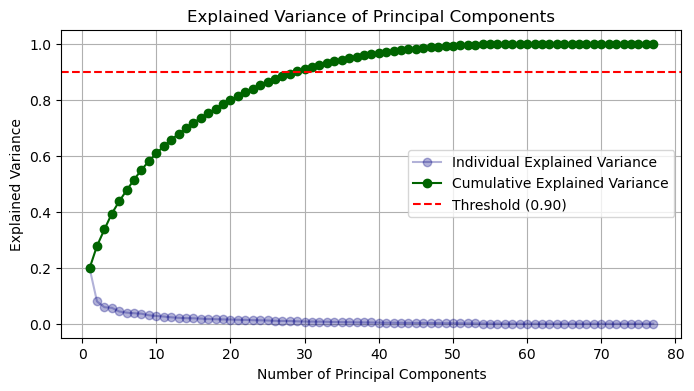

In [20]:
from sklearn.decomposition import PCA
# Applying PCA
pca = PCA()
df_pca = pca.fit_transform(scaled_df_encoded)
# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# Plot individual and cumulative explained variance
fig = plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='navy', alpha=0.3, label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='darkgreen', label='Cumulative Explained Variance')

plt.axhline(y=0.90, color='red', linestyle='--', label='Threshold (0.90)')


plt.xlabel('Number of Principal Components')
# plt.xlim([1,14])
# plt.xticks(np.arange(1,15))
plt.ylabel('Explained Variance')
plt.grid()
plt.title('Explained Variance of Principal Components')
plt.legend()

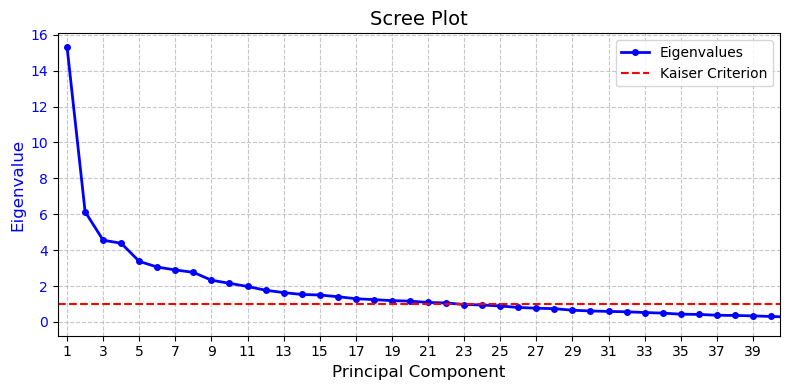

In [21]:
# Get eigenvalues for scree plot
eigenvalues = pca.explained_variance_
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create scree plot
fig = plt.figure(figsize=(8, 4))
ax = plt.gca()

# Plot eigenvalues (scree plot)
ax.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'b.-', linewidth=2, markersize=8, label='Eigenvalues')
ax.set_xlabel('Principal Component', fontsize=12)
ax.set_ylabel('Eigenvalue', fontsize=12, color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.set_xticks(np.arange(1, min(41, len(eigenvalues) + 1), step=2))
ax.grid(True, linestyle='--', alpha=0.7)

# Set title and limits
plt.title('Scree Plot', fontsize=14)
ax.set_xlim([0.5, 40.5])

ax.axhline(y=1, color='red', linestyle='--', label='Kaiser Criterion')

# Add combined legend
lines1, labels1 = ax.get_legend_handles_labels()

plt.legend()
plt.tight_layout()

Top 10 features contributing to PC1:
EDA_TD_P_Max: 0.2389 (0.2389)
EDA_TD_P_std: 0.2356 (0.2356)
EDA_TD_T_std: 0.2313 (0.2313)
EDA_TD_T_Slope_max: 0.2304 (0.2304)
EDA_TD_P_Slope_max: 0.2287 (0.2287)
EDA_TD_P_Slope_min: 0.2247 (-0.2247)
EDA_TD_T_Slope_min: 0.2234 (-0.2234)
EDA_TD_P_AUC: 0.2127 (0.2127)
EDA_TD_P_Mean: 0.2119 (0.2119)
EDA_TD_T_Max: 0.2100 (0.2100)


Top 10 features contributing to PC2:
active: 0.2585 (0.2585)
Phase_phase2: 0.2276 (0.2276)
EDA_TD_P_Peaks: 0.2267 (0.2267)
HR_TD_Mean: 0.2184 (0.2184)
HR_TD_AUC: 0.2142 (0.2142)
alert: 0.2126 (0.2126)
attentive: 0.2059 (0.2059)
HR_TD_Max: 0.2042 (0.2042)
HR_TD_Median: 0.2018 (0.2018)
determined: 0.2011 (0.2011)


Top 10 features contributing to PC3:
HR_TD_Max: 0.2506 (0.2506)
HR_TD_Slope_min: 0.2102 (-0.2102)
HR_TD_std: 0.2018 (0.2018)
EDA_TD_T_Min: 0.1986 (-0.1986)
HR_TD_Mean: 0.1982 (0.1982)
Phase_phase2: 0.1924 (-0.1924)
EDA_TD_T_Slope: 0.1907 (-0.1907)
TEMP_TD_Slope_max: 0.1905 (0.1905)
EDA_TD_T_Slope_mean: 0.1898 (-0.1898

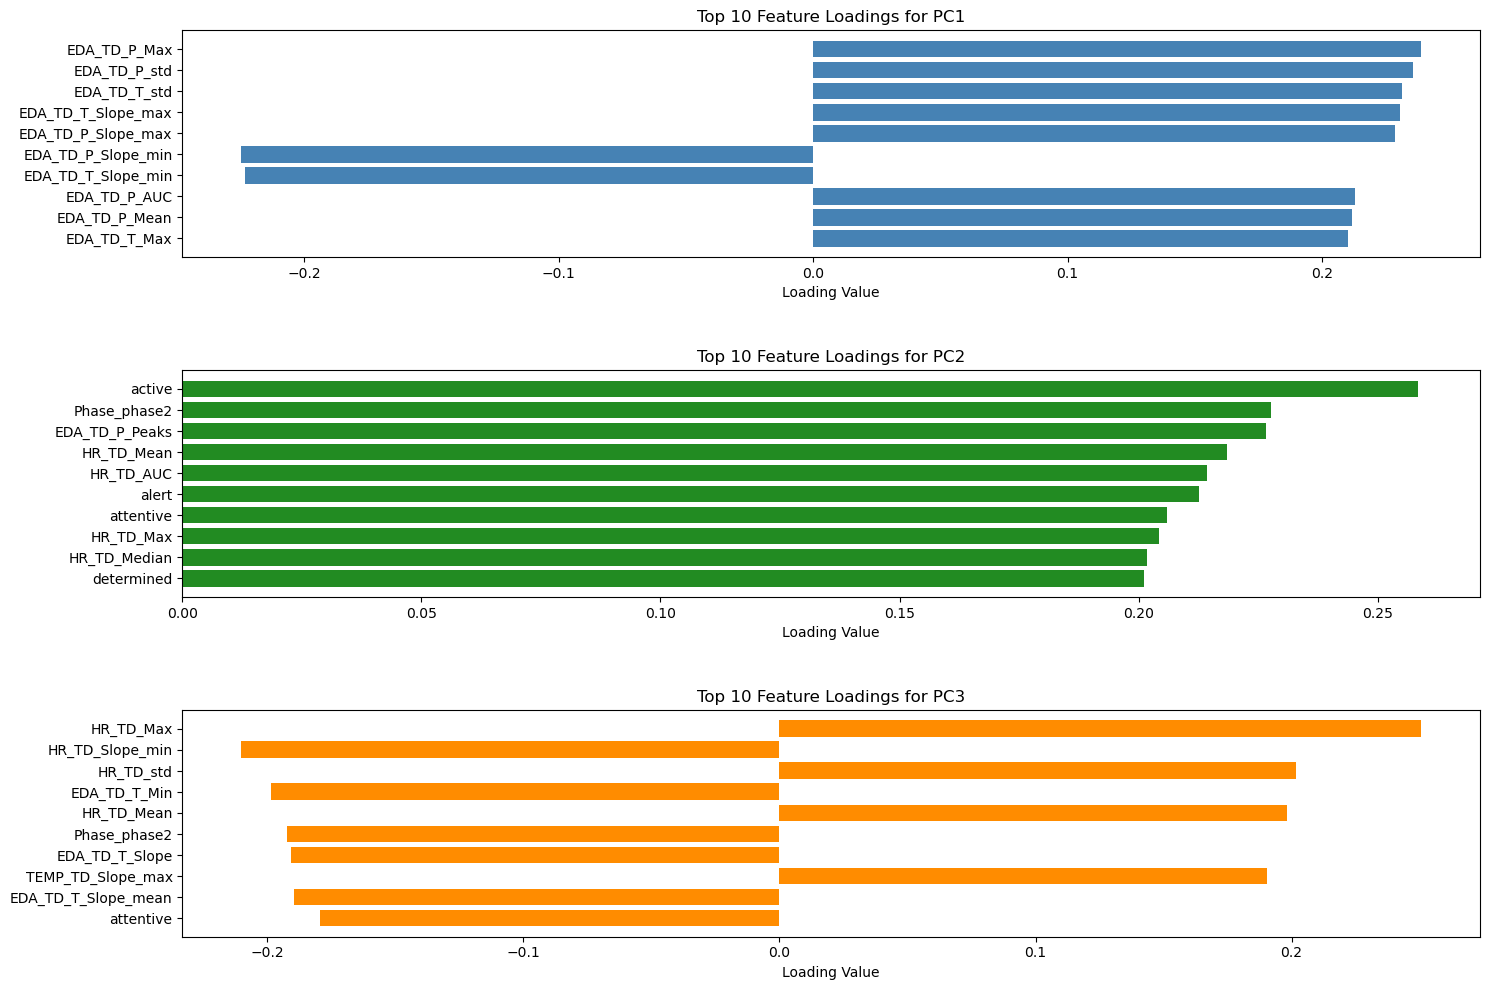

In [22]:
# Get the loadings (components)
loadings = pca.components_

# Create a DataFrame for easier interpretation
# Use the column names from the data used for PCA
feature_names = scaled_df_encoded.columns
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=feature_names)

# Get loadings for PC1 sorted by absolute value
pc1_loadings = loadings_df['PC1'].abs().sort_values(ascending=False)
print("Top 10 features contributing to PC1:")
for feature, loading in pc1_loadings.head(10).items():
    print(f"{feature}: {loading:.4f} ({loadings_df.loc[feature, 'PC1']:.4f})")

print("\n" + "="*50 + "\n") # Separator

# Get loadings for PC2 sorted by absolute value
pc2_loadings = loadings_df['PC2'].abs().sort_values(ascending=False)
print("Top 10 features contributing to PC2:")
for feature, loading in pc2_loadings.head(10).items():
    print(f"{feature}: {loading:.4f} ({loadings_df.loc[feature, 'PC2']:.4f})")

print("\n" + "="*50 + "\n") # Separator

# Get loadings for PC3 sorted by absolute value
pc3_loadings = loadings_df['PC3'].abs().sort_values(ascending=False)
print("Top 10 features contributing to PC3:")
for feature, loading in pc3_loadings.head(10).items():
    print(f"{feature}: {loading:.4f} ({loadings_df.loc[feature, 'PC3']:.4f})")

# Create visualizations of the top loadings
plt.figure(figsize=(15, 10))

# PC1 loadings
plt.subplot(3, 1, 1)
top_features_pc1 = pc1_loadings.head(10).index
# Get actual values for these features
pc1_values = loadings_df.loc[top_features_pc1, 'PC1']
# Sort by absolute values (descending)
sorted_indices = pc1_values.abs().sort_values(ascending=True).index
plt.barh(sorted_indices, pc1_values[sorted_indices], color='steelblue')
plt.title('Top 10 Feature Loadings for PC1', fontsize=12)
plt.xlabel('Loading Value')
plt.tight_layout()

# PC2 loadings
plt.subplot(3, 1, 2)
top_features_pc2 = pc2_loadings.head(10).index
# Get actual values for these features
pc2_values = loadings_df.loc[top_features_pc2, 'PC2']
# Sort by absolute values (descending)
sorted_indices = pc2_values.abs().sort_values(ascending=True).index
plt.barh(sorted_indices, pc2_values[sorted_indices], color='forestgreen')
plt.title('Top 10 Feature Loadings for PC2', fontsize=12)
plt.xlabel('Loading Value')
plt.tight_layout()

# PC3 loadings
plt.subplot(3, 1, 3)
top_features_pc3 = pc3_loadings.head(10).index
# Get actual values for these features
pc3_values = loadings_df.loc[top_features_pc3, 'PC3']
# Sort by absolute values (descending)
sorted_indices = pc3_values.abs().sort_values(ascending=True).index
plt.barh(sorted_indices, pc3_values[sorted_indices], color='darkorange')
plt.title('Top 10 Feature Loadings for PC3', fontsize=12)
plt.xlabel('Loading Value')
plt.tight_layout()

plt.subplots_adjust(hspace=0.5)

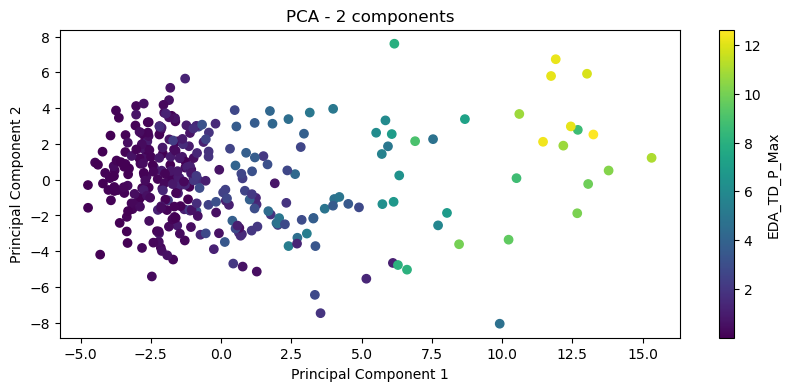

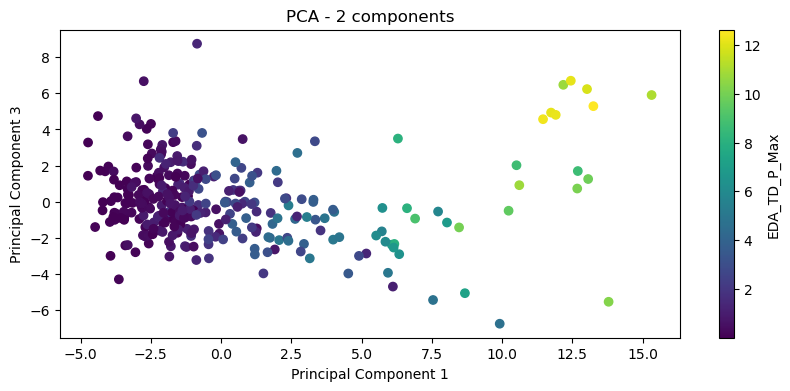

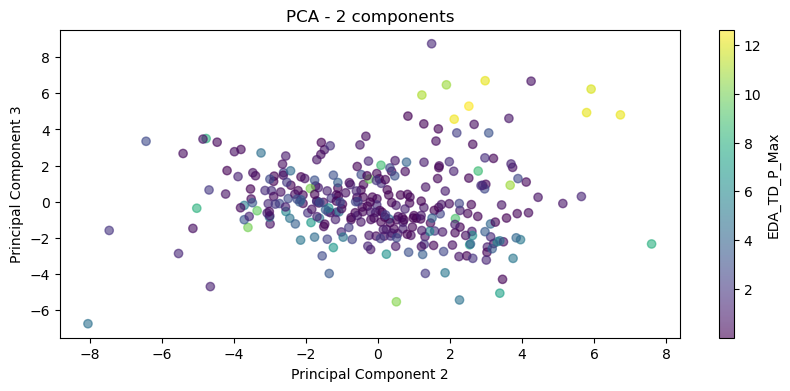

In [23]:
pc1 = df_pca[:, 0]
pc2 = df_pca[:, 1]
pc3 = df_pca[:, 2]

# PC1 vs PC2
fig = plt.figure(figsize=(10, 4))
scatter = plt.scatter(pc1, pc2, c=df_encoded['EDA_TD_P_Max'], cmap='viridis', alpha=1)
plt.colorbar(scatter, label='EDA_TD_P_Max')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2 components')
plt.show()

# PC1 vs PC3
fig = plt.figure(figsize=(10, 4))
scatter = plt.scatter(pc1, pc3, c=df_encoded['EDA_TD_P_Max'], cmap='viridis', alpha=1)
plt.colorbar(scatter, label='EDA_TD_P_Max')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PCA - 2 components')
plt.show()

# PC2 vs PC3
fig = plt.figure(figsize=(10, 4))
scatter = plt.scatter(pc2, pc3, c=df_encoded['EDA_TD_P_Max'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='EDA_TD_P_Max')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA - 2 components')
plt.show()

# Create scatter plots for the first 2-3 principal components
# First, create a DataFrame with the PCA results for easier plotting
pca_df = pd.DataFrame(data=df_pca[:, 0:3], columns=['PC1', 'PC2', 'PC3'])

# Add cohort information for coloring
pca_df['EDA_TD_P_Max'] = df_new['EDA_TD_P_Max'].values

# THIS FOR DISCRETE FEATURES
# # Plot PC1 vs PC2
# plt.figure(figsize=(10, 4))
# sns.scatterplot(x='PC1', y='PC2', hue='EDA_TD_P_Max', data=pca_df, palette='viridis', s=100, alpha=0.7)
# plt.title('PCA: PC1 vs PC2')
# plt.xlabel(f'PC1 ({explained_variance[0]:.2%} explained variance)')
# plt.ylabel(f'PC2 ({explained_variance[1]:.2%} explained variance)')
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend(title='Cohort')
# plt.tight_layout()

In [47]:
# First, create a DataFrame with the PCA results for easier plotting
pca_df = pd.DataFrame(data=df_pca[:, 0:3])
pca_df

,0,1,2
0,1.292404,-2.623351,1.608360
1,-3.799210,-0.634026,-0.605600
2,-2.736495,0.255197,0.661959
3,-2.870721,0.887607,0.258823
4,-2.256446,0.033691,1.272296
...,...,...,...
307,0.582306,-2.568560,-0.286396
308,1.200883,1.239427,-2.913077
309,1.094438,-0.810511,-1.419151
310,4.206952,-0.968185,-1.957783


# **Clustering**

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
# from sklearn.cluster import clusterplot

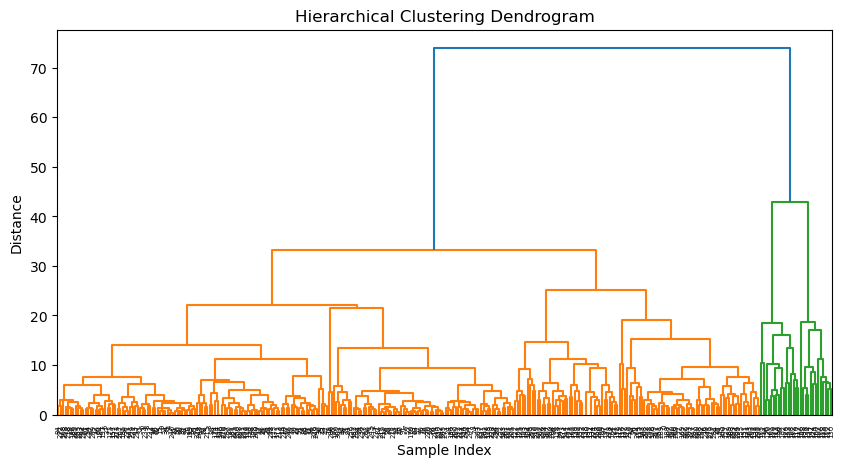

Normalized Mutual Information (NMI): 0.001


In [49]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

columns_desired = ['EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_ReT']
data_clustering = scaled_df_encoded[columns_desired]

Z = linkage(data_clustering, method='ward', metric='euclidean')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

from sklearn.metrics import normalized_mutual_info_score

cluster_labels = fcluster(Z, t=3, criterion='maxclust')
true_labels = df_new['Phase'].str[-1].astype('int')

nmi = normalized_mutual_info_score(true_labels, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

In [27]:
cluster_labels = fcluster(Z, t=3, criterion='maxclust')
true_phases = df_new['Phase'].str[-1].astype('int')
true_phases

0      1
1      1
2      1
3      1
4      1
      ..
307    1
308    2
309    2
310    3
311    3
Name: Phase, Length: 312, dtype: int32

### **Let's try to divide by emotions (positive and negative)**

## **Gaussian Mixture Models**

In [ ]:
from sklearn.mixture import GaussianMixture

